In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import norm

### Visualisation de la dataset + étude 

In [2]:
os.listdir()
df=pd.read_csv(r'D:\IronHack\Projet-Semaine-5-6\london_bike_sharing\london_merged_v1.csv.csv')

In [45]:
df.head()

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,2004-01-15,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,2004-01-15,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,2004-01-15,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,2004-01-15,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,2004-01-15,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,0.0,1.0,3.0


In [43]:
df.dtypes

index                         int64
timestamp                    object
date                 datetime64[ns]
year                          int64
month                        object
day                           int64
day_name                     object
week_number                   int64
time                         object
bike_number                   int64
temperature                 float64
temperature_feels           float64
hum                         float64
wind_speed                  float64
weather_code                 object
is_holiday                  float64
is_weekend                  float64
season                      float64
dtype: object

In [2]:
df.sample(25)

NameError: name 'df' is not defined

In [17]:
df['weather_code']

0        3.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
17409    3.0
17410    4.0
17411    4.0
17412    4.0
17413    2.0
Name: weather_code, Length: 17414, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              17414 non-null  int64  
 1   timestamp          17414 non-null  object 
 2   date               17414 non-null  object 
 3   year               17414 non-null  int64  
 4   month              17414 non-null  object 
 5   day                17414 non-null  int64  
 6   day_name           17414 non-null  object 
 7   week_number        17414 non-null  int64  
 8   time               17414 non-null  object 
 9   bike_number        17414 non-null  int64  
 10  temperature        17414 non-null  float64
 11  temperature_feels  17414 non-null  float64
 12  hum                17414 non-null  float64
 13  wind_speed         17414 non-null  float64
 14  weather_code       17414 non-null  object 
 15  is_holiday         17414 non-null  float64
 16  is_weekend         174

In [37]:
df['date']=pd.to_datetime(df['date'], format="%Y/%m/%d")

In [48]:
df['date']

0       2004-01-15
1       2004-01-15
2       2004-01-15
3       2004-01-15
4       2004-01-15
           ...    
17409   2003-01-17
17410   2003-01-17
17411   2003-01-17
17412   2003-01-17
17413   2003-01-17
Name: date, Length: 17414, dtype: datetime64[ns]

### Weather Code

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

In [18]:
dct1={1.0 : 'Clear',2.0 : 'Few clouds',3.0 : 'Broken clouds',4.0 : 'Cloudy',7.0 : 'Light rain',10.0 : 'Rain & Thunderstorm',26.0 : 'Snowfall',94.0 : 'Freezing Fog'}

In [19]:
dct1

{1.0: 'Clear',
 2.0: 'Few clouds',
 3.0: 'Broken clouds',
 4.0: 'Cloudy',
 7.0: 'Light rain',
 10.0: 'Rain & Thunderstorm',
 26.0: 'Snowfall',
 94.0: 'Freezing Fog'}

In [21]:
df['weather_code']=df['weather_code'].map(dct1)

In [39]:
df.shape

(17414, 18)

In [38]:
df.to_csv('london_merged_v2.csv', index=False)

In [26]:
os.getcwd()

'C:\\Users\\Danie'

In [3]:
df=pd.read_csv(r'D:\IronHack\Projet-Semaine-5-6\london_bike_sharing\london_merged_v4.csv')
df.head(1)

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0


### Plots

In [4]:
df.temperature.describe()

count    17342.000000
mean        12.500308
std          5.558676
min         -1.500000
25%          8.500000
50%         12.500000
75%         16.000000
max         34.000000
Name: temperature, dtype: float64

In [56]:
df.temperature_feels.describe()

count    17414.000000
mean        11.520836
std          6.615145
min         -6.000000
25%          6.000000
50%         12.500000
75%         16.000000
max         34.000000
Name: temperature_feels, dtype: float64

In [57]:
df.hum.describe()

count    17414.000000
mean        72.324954
std         14.313186
min         20.500000
25%         63.000000
50%         74.500000
75%         83.000000
max        100.000000
Name: hum, dtype: float64

In [58]:
df.wind_speed.describe()

count    17414.000000
mean        15.913063
std          7.894570
min          0.000000
25%         10.000000
50%         15.000000
75%         20.500000
max         56.500000
Name: wind_speed, dtype: float64

In [6]:
df.sample(20)

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
10246,10246,2016-03-08 03:00:00,08-03-2016,2016,Mar,8,Tuesday,10,03:00,20,1.5,-1.5,78.0,11.0,Clear,1,0.0,0.0,0.0
8204,8204,2015-12-13 17:00:00,13-12-2015,2015,Dec,13,Sunday,50,17:00,846,9.0,8.0,94.0,9.0,Broken clouds,3,0.0,1.0,3.0
15732,15732,2016-10-25 20:00:00,25-10-2016,2016,Oct,25,Tuesday,43,20:00,1255,13.0,13.0,79.5,5.0,Broken clouds,3,0.0,0.0,2.0
13650,13650,2016-07-29 08:00:00,29-07-2016,2016,Jul,29,Friday,30,08:00,3907,19.0,19.0,73.0,20.0,Broken clouds,3,0.0,0.0,1.0
1105,1105,2015-02-19 03:00:00,19-02-2015,2015,Feb,19,Thursday,7,03:00,39,5.0,1.0,76.0,19.5,Few clouds,2,0.0,0.0,3.0
14440,14440,2016-08-31 11:00:00,31-08-2016,2016,Aug,31,Wednesday,35,11:00,1189,21.0,21.0,55.0,22.5,Few clouds,2,0.0,0.0,1.0
4633,4633,2015-07-16 13:00:00,16-07-2015,2015,Jul,16,Thursday,28,13:00,1651,22.0,22.0,57.0,27.0,Broken clouds,3,0.0,0.0,1.0
13122,13122,2016-07-07 06:00:00,07-07-2016,2016,Jul,7,Thursday,27,06:00,731,16.0,16.0,65.5,11.0,Clear,1,0.0,0.0,1.0
6248,6248,2015-09-22 08:00:00,22-09-2015,2015,Sep,22,Tuesday,38,08:00,1587,12.0,12.0,88.0,12.0,Broken clouds,3,0.0,0.0,2.0
14724,14724,2016-09-13 20:00:00,13-09-2016,2016,Sep,13,Tuesday,37,20:00,1782,24.5,24.5,63.0,15.0,Clear,1,0.0,0.0,2.0


D:\IronHack\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum', ylabel='temperature'>

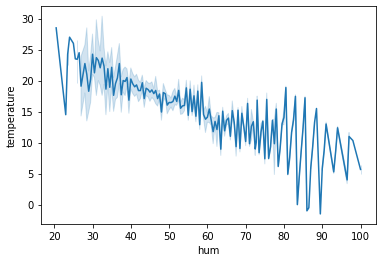

In [8]:
sns.lineplot(df['hum'], df['temperature'])

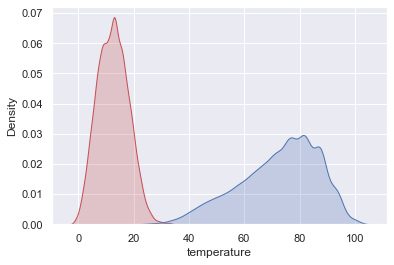

In [27]:
sns.set(style="darkgrid")
fig = sns.kdeplot(df['temperature'], shade=True, color="r")
fig = sns.kdeplot(df['hum'], shade=True, color="b")
plt.show()

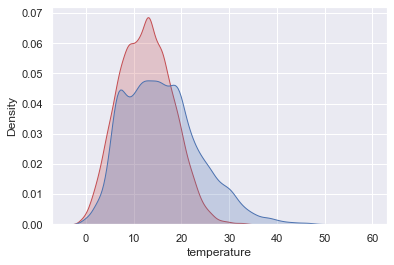

In [31]:
sns.set(style="darkgrid")
fig = sns.kdeplot(df['temperature'], shade=True, color="r")
fig = sns.kdeplot(df['wind_speed'], shade=True, color="b")
plt.show()

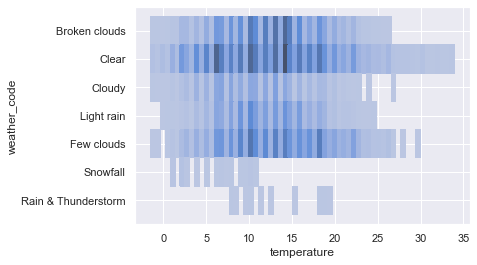

In [41]:
sns.set(style="darkgrid")
fig = sns.histplot(x=df['temperature'], y=df['weather_code'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (999,) and (17342,)

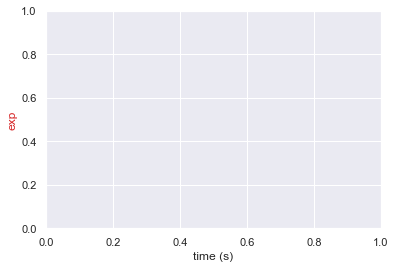

In [44]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = df['temperature']
data2 = df['hum']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()